In [1]:
from sklearn.datasets import make_classification
from numpy import where
from matplotlib import pyplot
import numpy as np

import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay #Визуализация границ решений.

sns.set(rc={'figure.figsize':(15,8)})
from sklearn.linear_model import LogisticRegression, SGDClassifier 

Класс SGDClassifier реализует обычную стохастическую процедуру обучения методом градиентного спуска, которая поддерживает различные функции потерь и штрафы для классификации. 

SGD - это всего лишь техника оптимизации и не соответствует определенному семейству моделей машинного обучения. Это лишь способ обучения модели. Часто экземпляр SGDClassifier или SGDRegressor будет иметь эквивалентную модель в scikit-learn API, потенциально использующий другую технику оптимизации. Например, использование SGDClassifier(loss='log_loss') приводит к логистической регрессии, то есть к модели, эквивалентной LogisticRegression, которая подгоняется с помощью SGD вместо того, чтобы подгоняться с помощью одного из других алгоритма в LogisticRegression.

In [2]:
from sklearn.neighbors import KNeighborsClassifier

Метод kNN относится к разряду ленивых классификаторов. В целом это указывает на то, что метод "обучается" лишь на новых данных, не учитывая предыдущий опыт. В данном же случае это означает, что в процессе обучения алгоритм не делает ничего, а только сохраняет размеченные тренировочные данные. Сам процесс классификации начинается только тогда, когда появляются новые немаркированные данные - алгоритм по каким-то признакам считает расстояния между уже размеченными и еще неизвестными объектами в пространстве. Очевидно, что, если мы будем рассчитывать расстояния между известными данными и каждым новым набором неразмеченных данных, то каждый раз будем получать различные расстояния между объектами, поэтому изначально "обучать" алгоритм на одних расстояниях, чтобы он запомнил, на какой позиции к какому классу относится объект, совершенно не имеет смысла - позиций может быть бесконечное множество, поэтому хранить их все в памяти не получится.

Алгоритм kNN состоит из трех последовательных этапов:
1) вычислить расстояние от целевого объекта (который необходимо классифицировать) до каждого из объектов обучающей выборки (уже маркированных каким-либо классом);
2) отобрать k объектов обучающей выборки, расстояния до которых минимальны (на первом этапе k выбирается произвольно, затем итеративно подбирается лучшее значение k на основе точности полученных прогнозов при каждом из выбранных k );
3) получить класс объекта на основе наиболее часто встречающегося среди k ближайших соседей (это может быть число или название класса в зависимости от того, как изначально были обозначены классы - например, в примере с беспилотниками это может быть "человек" или "бетонный блок").

Количество классов модель выясняет сама уже в процессе классификации: информация о классе содержится в самих объектах размеченных данных (во всех соседях), поэтому просто посчитать количество экземпляров одного и того же класса для алгоритма не составляет труда.

In [3]:
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import log_loss, confusion_matrix, roc_auc_score, precision_score, f1_score, recall_score, accuracy_score, RocCurveDisplay, roc_curve,ConfusionMatrixDisplay, classification_report

import pandas as pd

In [59]:
X, y = make_classification(n_samples=110, n_features=20, n_informative=2)

Генерирует случайную задачу классификации n-классов.

С помощью метода make_classification можно создать рандомный датасет с n классами. Этот метод позволяет создавать датасеты с выбранным количеством наблюдений, признаков и классов.
Он подходит для тестирования и отладки моделей классификации, таких как машины опорных векторов, деревья решений и наивные байесовские классификаторы.

n_samples
int, default=100
Количество образцов.

n_features
int, default=20
Общее количество признаков. Они включают n_informative информативных признаков, n_redundant избыточных признаков, n_repeated дублированных признаков и n_features-n_informative-n_redundant-n_repeated бесполезных признаков, выбранных случайным образом.

n_informative
int, default=2
Количество информативных признаков. Каждый класс состоит из ряда гауссовых кластеров, каждый из которых расположен вокруг вершин гиперкуба в подпространстве размерности n_informative. Для каждого кластера информативные признаки рисуются независимо от N(0, 1), а затем случайным образом линейно комбинируются внутри каждого кластера для добавления ковариации. Затем кластеры размещаются на вершинах гиперкуба.

Возвращает
X
ndarray of shape (n_samples, n_features)
The generated samples.

y
ndarray of shape (n_samples,)
The integer labels for class membership of each sample.

In [60]:
X = X[:, [2, 3]]

[x:y] - слайс от элемента х включительно до элемента y не включительно
если х или у пропущены оно берет начало или конец массива соответственно 

[1:5] = 1, 2, 3, 4
[:5] = 0,1,2,3,4
[6:] = 6,7,8, ... до конца массива (последнего элемента в массиве)

[:] = весь масси полностью

X = X[:, [2, 3]] - выделяем весь массив и в каждом элементе массива, который каждый в совою очередь так же предстваляет из себя массив берем второе и третье знаечение

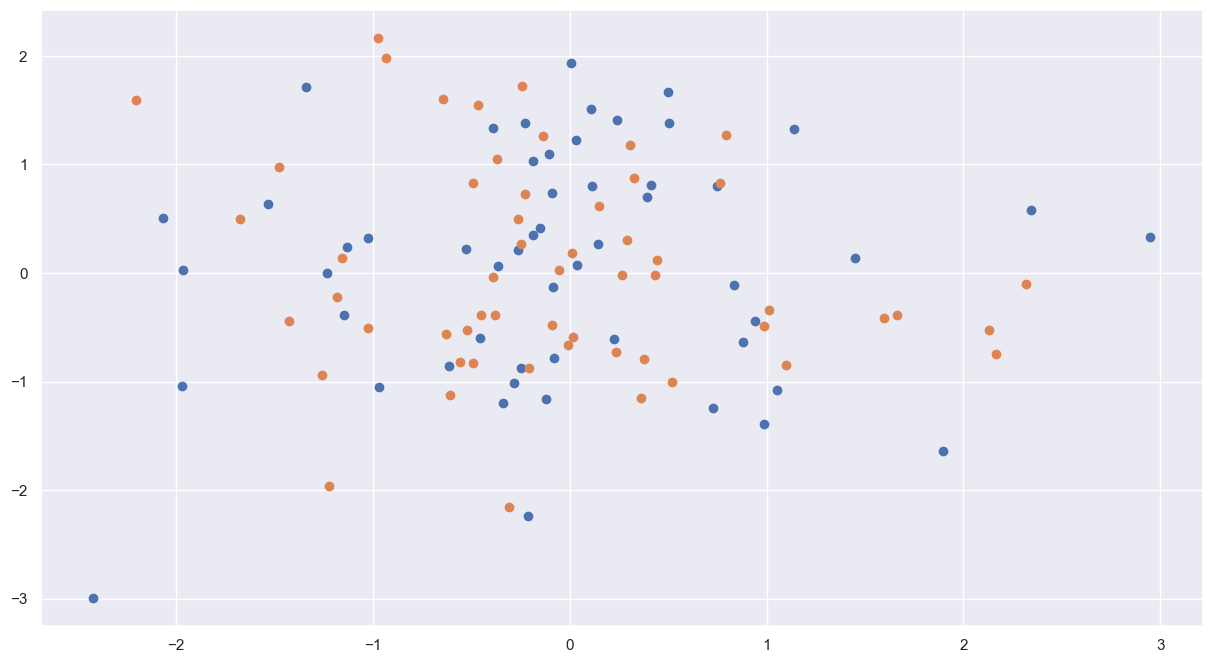

In [61]:
for class_value in range(2):
    # помещает на график точки из массива х(преврещенного в координаты (обрезанные до двух значений)), покрашенные массивоим у
    row_ix = where(y == class_value)
    # создать разброс этих образцов
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [62]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

Логистическая регрессия — это алгоритм классификации в машинном обучении для прогнозирования вероятности категориально зависимой переменной. В логистической регрессии зависимые переменные — это двоичные (бинарные) переменные, содержащие 1 (да, успех, и так далее) или 0 — нет, неудача, и так далее. 

Допущения логистической регрессии:

1) Двоичная логистическая регрессия требует двоичной зависимой переменной.
2) В случае двоичной регрессии уровень фактора 1 должен представлять из себя желаемый исход.
3) Включены должны быть только значимые переменные.
4) Независимые переменные должны быть независимы друг от друга, то есть модель должна обладать малой мультиколлинеарностью или не обладать ею.
5) Зависимые переменные линейно связаны с логарифмическими коэффициентами.
6) Логистическая регрессия требует довольно большого размера выборок.

In [63]:
y_pred = model.predict_proba(X)

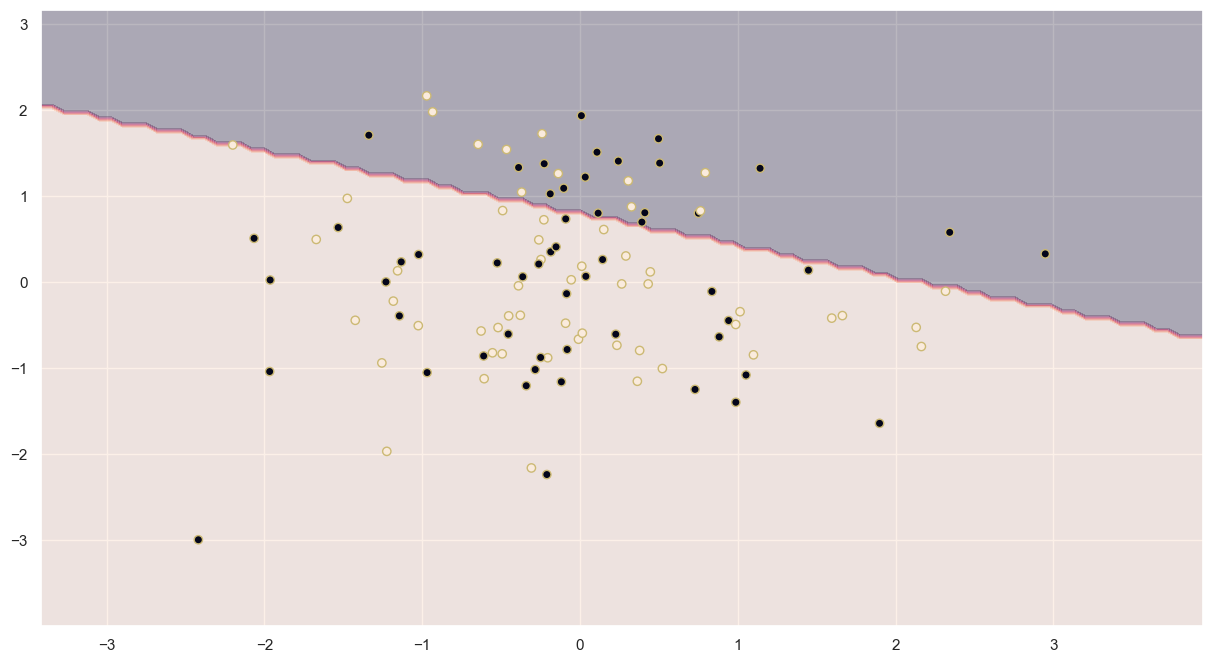

In [64]:
disp = DecisionBoundaryDisplay.from_estimator(
     model, X, response_method="predict",
     alpha=0.3
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="y")

disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

X[:, 0] - выделяются все первые элементы для координаты х
X[:, 1] - выделяются все вторые элементы для координаты у
c=y - окрашивание точек в соответсвии с матрицей ответов
edgecolor="k" - цвет обводки точек по CMYK

# Почему формула logloss такая?

Формула logloss основана на принципе максимального правдоподобия, который стремится максимизировать вероятность наблюдаемых данных при данных параметрах модели. В контексте классификации это означает, что мы хотим, чтобы вероятности, предсказанные моделью, как можно точнее соответствовали истинным меткам классов.

## Вывод формулы через максимальное правдоподобие:

Предположим, у нас есть бинарная классификация с истинными метками классов $y \in \{0,1\}$, и модель выдает вероятности $p$ того, что наблюдение принадлежит к классу 1. Для одного наблюдения функция правдоподобия определяется как:

$$
L = p^y(1-p)^{(1-y)}
$$

Прологарифмировав её, получаем логарифм правдоподобия:

$$
\log(L) = y\log(p) + (1-y)\log(1-p)
$$

Поскольку мы стремимся максимизировать логарифм правдоподобия, задача минимизации его отрицательного значения приводит нас к функции потерь, известной как logloss:

$$
L(y, p) = -\big(y\log(p) + (1-y)\log(1-p)\big)
$$

Таким образом, минимизируя logloss, мы фактически максимизируем правдоподобие предсказаний модели относительно истинных данных. Это делает logloss отличным выбором для оценки и оптимизации классификаторов.

## Интерпретация logloss:

- **Для $y = 1$:** формула упрощается до $-\log(p)$. Если модель предсказывает $p$ близкое к 1, значит, она уверена в правильности класса, и logloss стремится к 0. Если $p$ отдаляется от 1, logloss увеличивается, что преподносится как "наказание" за уверенность в неверном предсказании.

- **Для $y = 0$:** формула упрощается до $-\log(1-p)$. Здесь, если $p$ близко к 0, logloss стремится к 0, показывая, что предсказание верно. Если же $p$ увеличивается, logloss возрастает, наказывая модель за неверное предсказание вероятности принадлежности к классу.

Таким образом, logloss эффективно "наказывает" модель за уверенные предсказания неправильного класса, делая его ценным инструментом для оценки точности классификатора.


In [12]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [13]:
y_pred = model.predict_proba(X)
log_loss(y, y_pred)

2.220446049250313e-16

predict_proba - предсказание вероятности которе и жрет логлосс который работает только с вероятностями потому что мы не можем ничего сказать точно только вероятности принадлежности конкретных значений к одной или другой круппе нашей классификации

чем ближе значение к 0 тем лучше модель

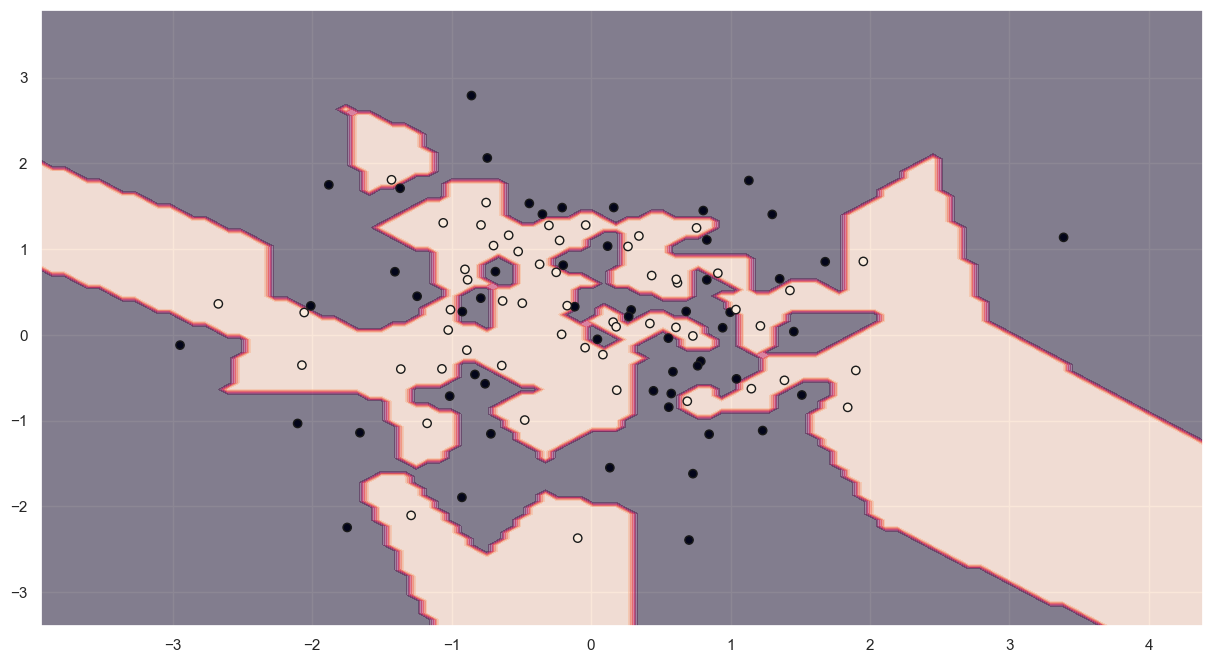

In [14]:
disp = DecisionBoundaryDisplay.from_estimator(
     model, X, response_method="predict",
     alpha=0.5
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

In [15]:
model = SVC(gamma='auto', kernel='poly',probability=True)
model.fit(X, y)

SVC(gamma='auto', kernel='poly', probability=True)

Метод опорных векторов (Support Vector Machines - SVM) - это набор методов контролируемого обучения, используемых для классификации, регрессии и выявления выбросов.

Метод опорных векторов пытается найти оптимальную разделяющую гиперплоскость между различными классами данных. Эта гиперплоскость максимизирует расстояние между ближайшими точками каждого класса, которые называются опорными векторами. Таким образом, метод опорных векторов пытается найти наилучшее разделение между классами, даже если данные не являются линейно разделимыми.

SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

1) Cfloat, default=1.0
   Параметр C: Параметр C контролирует степень регуляризации. Высокое значение C приводит к меньшей регуляризации и более сложной модели, в то время как низкое значение C приводит к большей регуляризации и более простой модели. Чтобы выбрать оптимальное значение C, можно использовать кросс-валидацию и поиск по сетке. Например, в Scikit-learn можно использовать GridSearchCV для автоматического поиска оптимального значения C.
2) kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
   Ядра (Kernels): SVC и SVR поддерживают различные ядра, такие как линейное, полиномиальное и радиально-основное (RBF). Выбор ядра зависит от природы данных. Например, если данные линейно разделимы, линейное ядро может быть лучшим выбором. Если данные имеют сложную структуру, RBF ядро может дать лучшие результаты. Опять же, поиск по сетке может помочь в выборе оптимального ядра.
3) gamma{‘scale’, ‘auto’} or float, default=’scale’
   Параметры ядра: Некоторые ядра, такие как полиномиальное и RBF, имеют дополнительные параметры, которые необходимо настроить. Например, для RBF ядра есть параметр gamma, который контролирует ширину радиальной базы. Более высокое значение gamma приводит к более сложной границе решения. Опять же, поиск по сетке может помочь в выборе оптимальных параметров ядра.
    * если gamma='scale' (по умолчанию) передано, то в качестве значения гаммы используется 1 / (n_features * X.var()),
    * если ‘auto’, используется 1 / n_features
    * если float, должно быть неотрицательным.

4) probability bool, default=False
   Включать ли оценки вероятности. Это необходимо включить до вызова fit, замедлит этот метод, поскольку он внутренне использует 5-кратную перекрестную проверку, а predict_proba может быть несовместимым с predict.

In [16]:
y_pred = model.predict_proba(X)
log_loss(y, y_pred)

0.7063238082129859

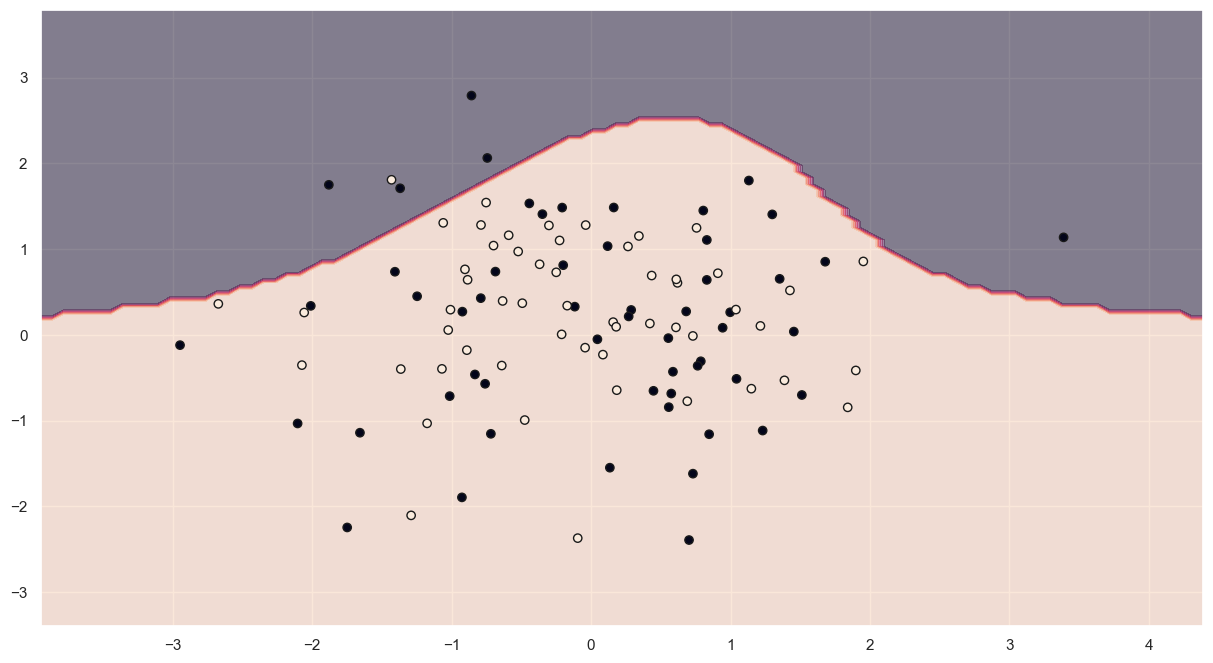

In [17]:
disp = DecisionBoundaryDisplay.from_estimator(
     model, X, response_method="predict",
     alpha=0.5
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

# Проанализируем датасет побольше

In [18]:
columnNames = ['IsWon', 'ClusterId', 'GameMode', 'GameType', 'AntiMage', 'Axe', 'Bane', 'Bloodseeker', 'CrystalMaiden', 'DrowRanger',
          'Earthshaker', 'Juggernaut','Mirana', 'Shadow Fiend', 'Morphling', 'PhantomLancer', 'Puck', 'Pudge', 'Razor','SandKing',
          'StormSpirit','Sven','Tiny','VengefulSpirit','Windranger','Zeus','Kunkka','Lina','Lich','Lion','ShadowShaman',
          'Slardar','Tidehunter','Witch Doctor','Riki','Enigma','Tinker','Sniper','Necrophos','Warlock','Beastmaster','QueenOfPain',
          'Venomancer','FacelessVoid','SkeletonKing','DeathProphet','PhantomAssassin','Pugna','TemplarAssassin','Viper','Luna',
          'DragonKnight','Dazzle','Clockwerk','Leshrac','NaturesProphet', 'Lifestealer','Dark Seer','Clinkz','Omniknight','Enchantress',
          'Huskar','NightStalker','Broodmother','BountyHunter','Weaver','Jakiro','Batrider','Chen','Spectre','Doom','AncientApparition',
          'Ursa','SpiritBreaker','Gyrocopter','Alchemist','Invoker','Silencer','OutworldDevourer','Lycanthrope','Brewmaster',
          'ShadowDemon','LoneDruid','ChaosKnight','Meepo','TreantProtector','OgreMagi','Undying','Rubick','Disruptor','NyxAssassin',
          'NagaSiren','KeeperOfTheLight','Wisp','Visage','Slark','Medusa','TrollWarlord','CentaurWarrunner','Magnus',
          'Timbersaw','Bristleback','Tusk','Skywrath Mage','Abaddon','ElderTitan', 'LegionCommander', 'Techies',
          'EmberSpirit','EarthSpirit','AbyssalUnderlord','Terrorblade','Phoenix','Oracle','WinterWyvern','ArcWarden','MonkeyKing']

train = pd.read_csv('dota2Train.csv', names = columnNames)
test = pd.read_csv('dota2Test.csv', names = columnNames)



Данный датасет был уже разбит на обучающую и тестовую выборки. Проверим их размерности и основные параметры:


In [19]:
train.head()

,IsWon,ClusterId,GameMode,GameType,AntiMage,Axe,Bane,Bloodseeker,CrystalMaiden,DrowRanger,...,Techies,EmberSpirit,EarthSpirit,AbyssalUnderlord,Terrorblade,Phoenix,Oracle,WinterWyvern,ArcWarden,MonkeyKing
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train.shape

(92650, 117)

In [21]:
test.shape

(10294, 117)



В данных выборках находится в сумме 102944 записей и 117 атрибутов, где каждая запись - это отдельно взятая игра, где:

    IsWon - выиграна данная игра или нет

    ClusterId - Id региона, где данная игра проходила (Восточная, Западная Европа, Северная, Южная Америка и т.п)

    GameMode - Режим игры (All pick - свободный выбор героя, Random Draft - выбор из рандомного пула героев и т.д.)

    Тип игры - Тип игры (Рейтинговая, обычная и т.д.)

5 - 117) Данные по всем героям, в каждом ряду(игре) находится информация о 10 героях, которые были в данное игре, и в какой команде были выбраны (1 - победителей, -1 - проигравших)

Исходя из размерностей обучающей и тестовой выборок, можно сделать вывод, что они поделены в соотношении 10% и 90%. В таком соотношении обучающая выборка является слишком большой и скорее всего результат на тестовой выборке будет не совсем удовлетворительным.

In [22]:
all_data = pd.concat((train, test), sort=True).reset_index(drop=True)
data = pd.get_dummies(all_data, columns=['GameMode', 'GameType', 'ClusterId'])

In [23]:
data.head()

,Abaddon,AbyssalUnderlord,Alchemist,AncientApparition,AntiMage,ArcWarden,Axe,Bane,Batrider,Beastmaster,...,ClusterId_213,ClusterId_223,ClusterId_224,ClusterId_225,ClusterId_227,ClusterId_231,ClusterId_232,ClusterId_241,ClusterId_251,ClusterId_261
0,0,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,0,0,-1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [24]:
data.IsWon = data.IsWon.replace({-1:0})

In [25]:
y = data['IsWon']
X = data.drop('IsWon', axis=1)

In [26]:
np.mean(y)

0.5273158221945913

среднее значение побед и тут в 52% случаев победила команда света условна

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
X_test.info()

Начнем с логистической регрессии

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred)

0.5997291887436712

Метрика accuracy (правильность классификации) – это один из самых простых и часто используемых способов измерения того, насколько хорошо модель справляется с задачей. Он измеряет долю правильных предсказаний модели среди всех предсказаний.

В библиотеке scikit-learn за расчёт метрики accuracy отвечает функция accuracy_score(), которая имеет следующий синтаксис:

accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

Параметры функции accuracy_score():
1) y_true - список реальных меток, истинные значения классов
2) y_pred - список предсказанных значений
3) normalize - если тру, возвращает долю правильных предскзаний, если фолс возвращает абсолютное количество правильных предсказаний
4) sample_weight - массив весов для каждого примера, позволяет задать разный вес примерам. если none, все примеры имеют одинаковый вес. массив должен быть такой же длины как и y_true и y_pred

Предположим, у вас есть 10 сообщений. Из них 6 – это не спам (реальные классы: 0), а 4 – спам (реальные классы: 1). Вы сделали предсказания с помощью модели, и они выглядят так:

Реальные метки:   0, 0, 1, 1, 0, 0, 1, 0, 0, 1
Предсказания:     0, 0, 0, 1, 0, 1, 1, 0, 0, 0
Теперь считаем, сколько раз предсказания совпали с реальными метками:

Нулевая позиция: реальный класс – 0, предсказание – 0 (совпадение).
Первая позиция: реальный класс – 0, предсказание – 0 (совпадение).
Вторая позиция: реальный класс – 1, предсказание – 0 (промах).
Третья позиция: реальный класс – 1, предсказание – 1 (совпадение).
Четвертая позиция: реальный класс – 0, предсказание – 0 (совпадение).
Пятая позиция: реальный класс – 0, предсказание – 1 (промах).
Шестая позиция: реальный класс – 1, предсказание – 1 (совпадение).
Седьмая позиция: реальный класс – 0, предсказание – 0 (совпадение).
Восьмая позиция: реальный класс – 0, предсказание – 0 (совпадение).
Девятая позиция: реальный класс – 1, предсказание – 0 (промах).
Из 10 предсказаний 7 были правильными. Так что accuracy будет равно:



In [31]:
roc_auc_score(y_test,y_pred)

0.5952958533844672

В машинном обучение очень важны метрики оценки эффективности моделей. Среди таких метрик есть: кривые ROC и показатель AUC. Они позволяют оценивать бинарные классификаторы.

Кривая ROC – это график, который иллюстрирует производительность классификационной модели при всех возможных порогах классификации. Ось X данного графика представляет собой FPR, т.е ложноположительную частоту, а ось Y — TRP, т.е истинноположительную частоту.

Оценка качества модели через расчет площади под ROC кривой, используя roc_auc_score:

AUC ROC (площадь под кривой ошибок)


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.51      0.55     16094
           1       0.61      0.68      0.64     17878

    accuracy                           0.60     33972
   macro avg       0.60      0.60      0.59     33972
weighted avg       0.60      0.60      0.60     33972



In [34]:
confusion_matrix(y_test, y_pred)

array([[ 8222,  7872],
       [ 5726, 12152]], dtype=int64)

Одним из самых наиболее развёрнутых способов оценки качества классификации является применение матрицы ошибок. Матрица ошибок представляет собой квадратную таблицу, в которой отображается количество предсказанных и фактических классов для классификационной модели. В этой матрице строки представляют истинные классы (реальные метки), а столбцы представляют предсказанные классы (метки, которые предсказала модель). Размер матрицы соответствует количеству классов.

фактический отрицательный класс TN  FP  
фактический положительный класс FN  TP
                спрогнозированный   спрогнозированный  
                    отрицательный   положительный
                            класс   класс

где:

TP (True Positive) — истинно положительные примеры;
TN (True Negative) — истинно отрицательные примеры;
FP (False Positive) — ложноположительные примеры;
FN (False Negative) — ложноотрицательные примеры.


В статистике ложноположительный пример (FP) называют ошибкой I рода, а ложноотрицательный (FN) – ошибкой II рода.

Допустим у нас имеется список с истинными метками классов y_true и список с предсказанными моделью метками классов y_pred.

y_true = [0, 1, 0, 0, 1, 0, 1, 1, 0]  
y_pred = [0, 0, 0, 0, 1, 0, 1, 1, 0] 

Объявив 1 положительным классом, а 0 – отрицательным классом, мы можем рассмотреть элементы матрицы ошибок в терминах истинно положительных (True Positive), истинно отрицательных (True Negative), ложноположительных (False Positive) и ложноотрицательных (False Negative) примеров.

В этом случае, матрица ошибок будет иметь следующий вид:

5  0

1  3

Давайте определимся, какие числа в данной матрице являются истинно/ложноположительными и истинно/ложноотрицательными. В этом вопросе отталкиваться нужно от спрогнозированного класса. Например, если спрогнозировали 0, то значит мы предсказали отрицательный класс (отрицательный – потому что изначально класс 0, мы объявили отрицательным классом (Negative), а класс 1 – положительным (Positive)).

Модель правильно (True) предсказала 0 (Negative) в 5 случаях – значит TN=5.
Модель неправильно (False) предсказала 0 (Negative) в 1 случае – значит FN=1.
Модель правильно (True) предсказала 1 (Positive) в 3 случаях – значит TP=3.
Модель неправильно (False) предсказала 1 (Positive) в 0 случаев – значит FP=0.
Элементы главной диагонали (от верхнего левого до нижнего правого угла) представляют правильно классифицированные образцы. Чем больше значения на диагонали, тем лучше модель справляется с классификацией этих классов.

В библиотеке scikit-learn за создание матрицы ошибок отвечает функция confusion_matrix(), которая имеет следующий синтаксис:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

Параметры функции confusion_matrix():
1) y_true - истинные метки классов
2) y_pred - предсказанные метки классов
3) labels - список уникальных классов. если не указано, классы будут извлечены из y_true и y_pred. порядок классов в матрице соответствует порядку этих меток
4) sample_weight - массив весов для каждой выборки. если не указан, все выборки считаются равновесными
5) normalize - опция для нормализации ошибок. "true": нормализация по истинным меткам (каждая строка будет делиться на сумму строки). "pred": нормализация по предсказанным меткам (каждый столбец будет делиться на сумму столбца). "all": нормализация по всем элементам матрицы (каждый элемент будет делиться на общую сумму). Если указано None, матрица останется ненормализованной.

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)

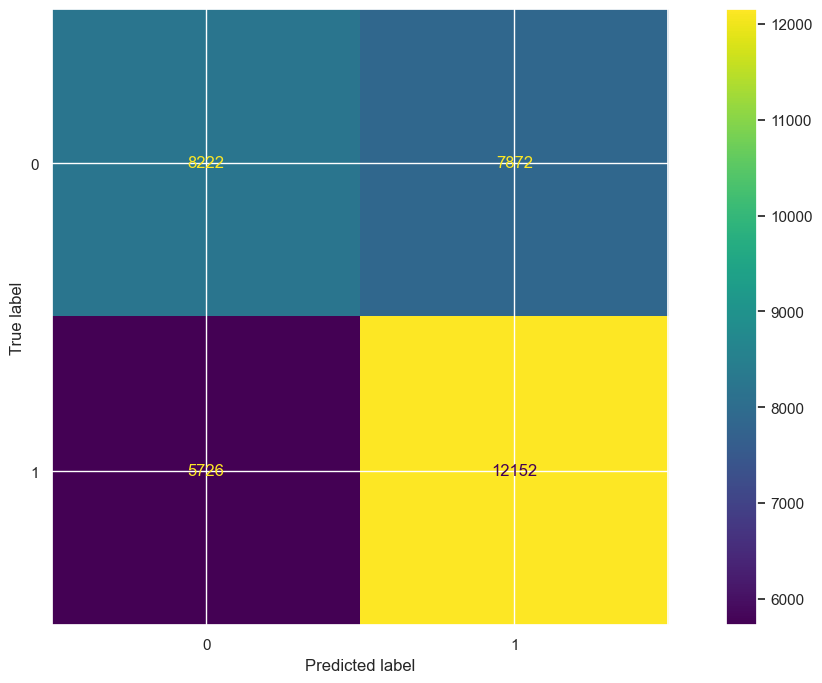

In [36]:
disp.plot()

In [37]:
y_test_proba = model.predict_proba(X_test)[:, -1]

In [38]:
y_test_proba

array([0.6670384 , 0.63189802, 0.41572477, ..., 0.36000533, 0.48960428,
       0.42624595])

Проверим KNN

In [39]:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [40]:
y_pred = model.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.53      0.52     16094
           1       0.57      0.55      0.56     17878

    accuracy                           0.54     33972
   macro avg       0.54      0.54      0.54     33972
weighted avg       0.54      0.54      0.54     33972



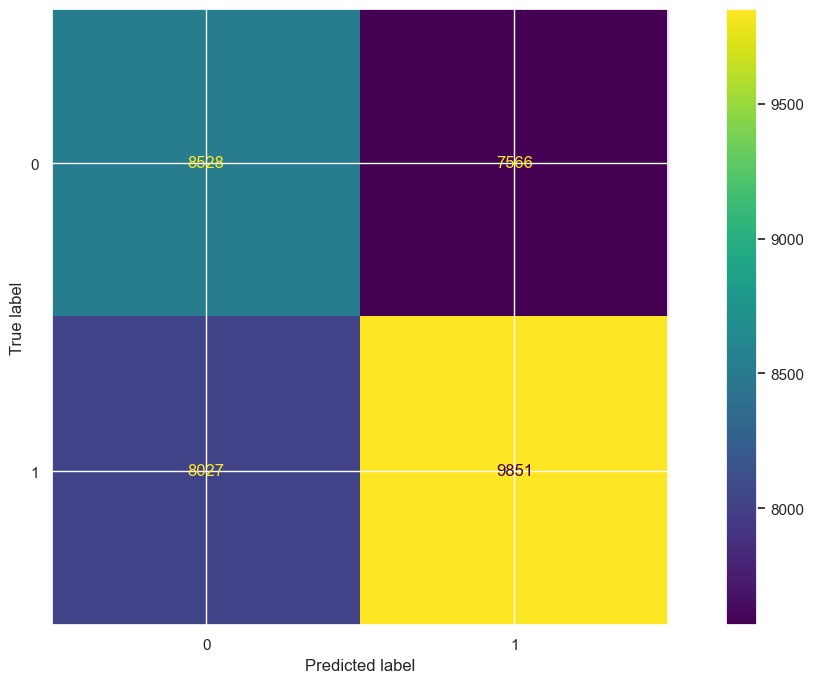

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)
disp.plot()

Проверим SVM

In [43]:
model = SVC(gamma='auto', kernel='linear')
model.fit(X_train.iloc[:, [2, 3]], y_train)

SVC(gamma='auto', kernel='linear')

In [44]:
y_pred = model.predict(X_test.iloc[:, [2, 3]])

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     16094
           1       0.53      1.00      0.69     17878

    accuracy                           0.53     33972
   macro avg       0.26      0.50      0.34     33972
weighted avg       0.28      0.53      0.36     33972



c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

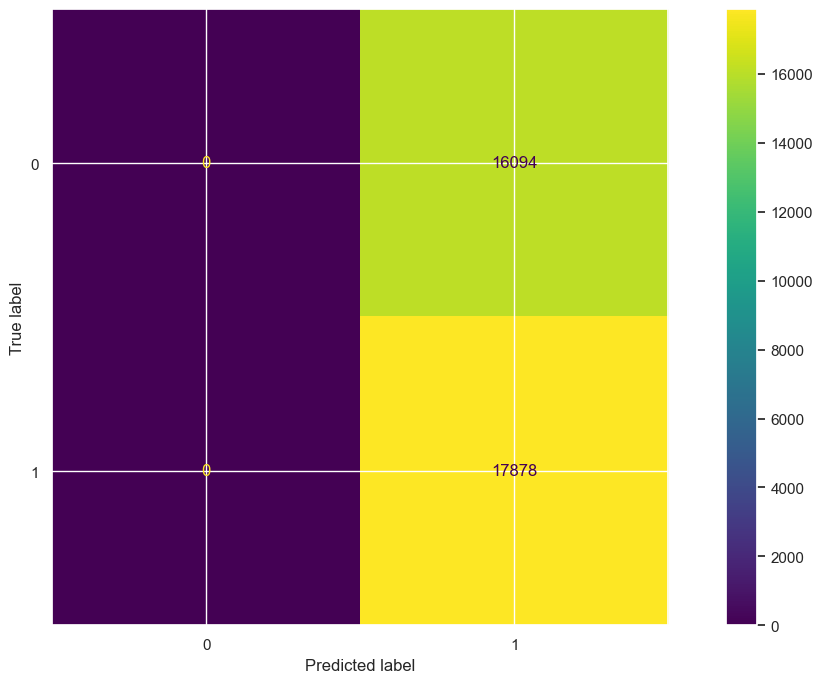

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)
disp.plot()

In [47]:
model = SGDClassifier()
model.fit(X_train, y_train)

SGDClassifier()

In [48]:
y_pred = model.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.63      0.59     16094
           1       0.62      0.56      0.59     17878

    accuracy                           0.59     33972
   macro avg       0.59      0.59      0.59     33972
weighted avg       0.59      0.59      0.59     33972



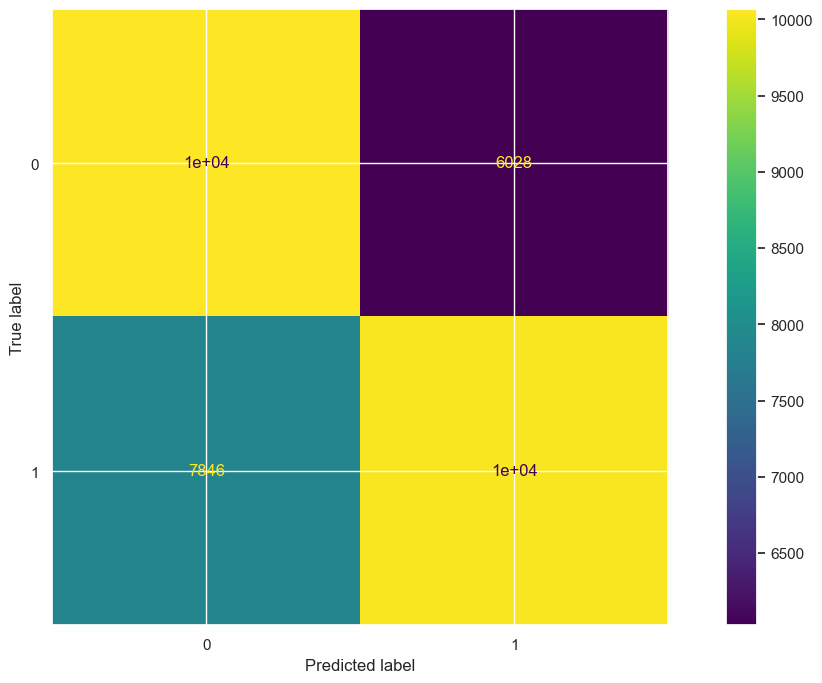

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)
disp.plot()

In [51]:
from sklearn.decomposition import PCA

Метод главных компонент (англ. principal component analysis, PCA) — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. Альтернативно суть PCA можно определить как линейное проецирование, минимизирующее среднеквадратичное расстояние между исходными точками и их проекциями.

Изначально матрица признаков обязательно центрируется, чтобы первая главная компонента могла соответствовать направлению максимальной вариации данных, а не просто их среднему значению. Обычно нахождение главных компонент сводится к двум основным методам:

* Вычисление собственных векторов и собственных значений ковариационной матрицы данных. Поскольку ковариационная матрица отражает степень линейной связи между различными переменными, то собственные вектора этой матрицы будут задавать направления, вдоль которых дисперсия данных максимальна, а собственные значения — величину этой дисперсии. Собственное значение, соответствующее собственному вектору, характеризует вклад этого вектора в объяснение дисперсии данных и чем больше собственное значение, тем значимее главная компонента. Обычно отбираются только те главные компоненты, которые объясняют заданный уровень дисперсии, например, 95%.

* Вычисление сингулярного разложения матрицы данных. Сингулярное разложение — это способ представления любой матрицы в виде произведения трёх других матриц: левой сингулярной матрицы U, диагональной матрицы сингулярных значений S и правой сингулярной матрицы V, где сингулярные значения — это квадратные корни собственных значений ковариационной матрицы данных (именно для этого в данном случае выполняется предварительное центрирование данных), правая сингулярная матрица V будет соответствовать собственным векторам ковариационной матрицы данных, а левая U будет являться проекцией исходных данных на главные компоненты, определённые матрицей V. Таким образом, сингулярное разложение также позволяет выделить главные компоненты, но без необходимости в вычислении ковариационной матрицы. Помимо того, что такое решение более эффективно, оно считается более численно стабильным, поскольку не требует вычисления ковариационной матрицы напрямую, которая может быть плохо обусловлена в случае сильной корреляции признаков. Именно данный подход используется в реализации scikit-learn

Параметр n_components указывает на количество измерений, на которые будет производиться проекция, то есть до скольки измерений мы хотим снизить наш датасет.

In [52]:
pca = PCA(n_components=7)

In [53]:
pcaX = pca.fit_transform(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(pcaX, y, test_size=0.33)

In [55]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
y_pred = model.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.24      0.33     16073
           1       0.54      0.80      0.65     17899

    accuracy                           0.53     33972
   macro avg       0.53      0.52      0.49     33972
weighted avg       0.53      0.53      0.49     33972



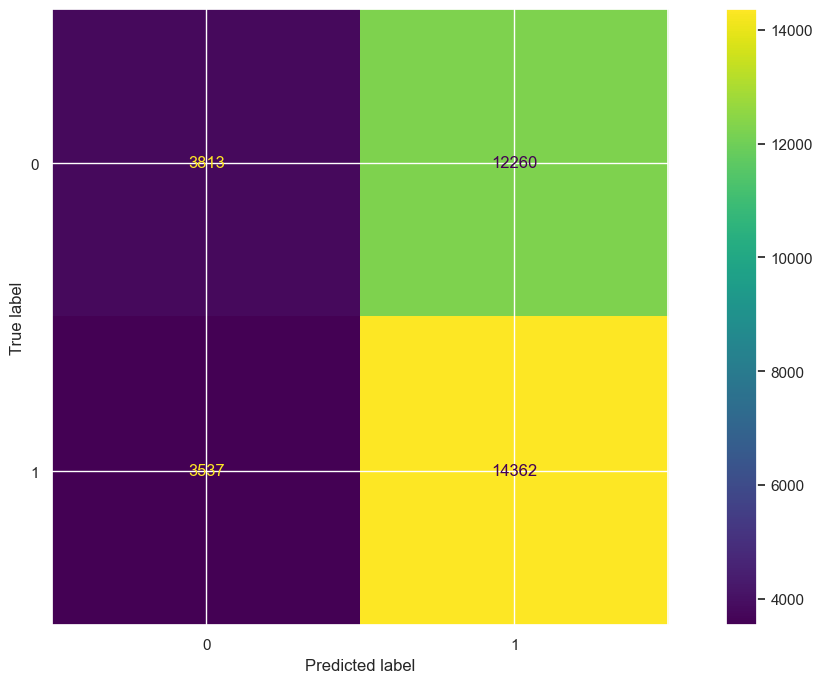

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)
disp.plot()